In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
breastcancerdf=pd.read_csv('/Users/adelamar_ifds/breastcanceranalysis/breast-cancer.csv')

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'radius_mean'}>,
        <AxesSubplot: title={'center': 'texture_mean'}>,
        <AxesSubplot: title={'center': 'perimeter_mean'}>,
        <AxesSubplot: title={'center': 'area_mean'}>,
        <AxesSubplot: title={'center': 'smoothness_mean'}>],
       [<AxesSubplot: title={'center': 'compactness_mean'}>,
        <AxesSubplot: title={'center': 'concavity_mean'}>,
        <AxesSubplot: title={'center': 'concave points_mean'}>,
        <AxesSubplot: title={'center': 'symmetry_mean'}>,
        <AxesSubplot: title={'center': 'fractal_dimension_mean'}>,
        <AxesSubplot: title={'center': 'radius_se'}>],
       [<AxesSubplot: title={'center': 'texture_se'}>,
        <AxesSubplot: title={'center': 'perimeter_se'}>,
        <AxesSubplot: title={'center': 'area_se'}>,
        <AxesSubplot: title={'center': 'smoothness_se'}>,
        <AxesSubplot: title={'center': 'compactness_se'}>,
        <AxesSubplot:

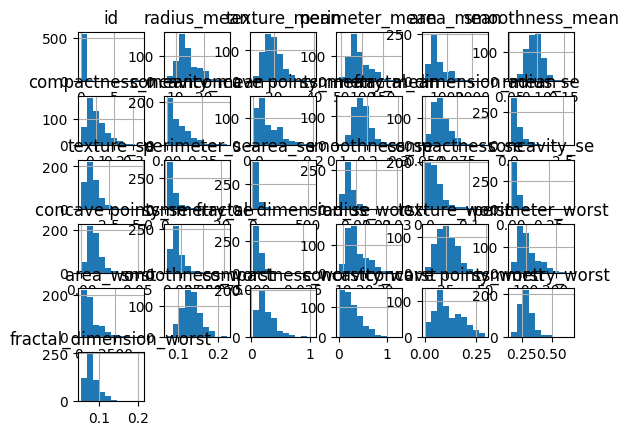

In [4]:

breastcancerdf.hist()


In [5]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
breastcancerdf['diagnosis']=l.fit_transform(breastcancerdf.diagnosis)
breastcancerdf.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
x = breastcancerdf.iloc[:, 1:-1].values
y = breastcancerdf.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [8]:
X_train=breastcancerdf.drop(columns=["diagnosis"])
y_train=breastcancerdf["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

In [9]:
print('Train dataset shape:',X_train.shape)
print('Test dataset shape', y_train.shape)

Train dataset shape: (455, 31)
Test dataset shape (455,)


In [10]:
numeric_columns = X_train.select_dtypes(exclude='object').columns
print(numeric_columns)
print('*'*100)
categorical_columns = X_train.select_dtypes(include='object').columns
print(categorical_columns)

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
****************************************************************************************************
Index([], dtype='object')


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import auc, classification_report,confusion_matrix, roc_curve, RocCurveDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier


numeric_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler(with_mean=True))
])

print(numeric_features)
print('*'*100)

categorical_features = Pipeline([
    ('handlingmissingvalues',SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder()),
    ('scaling', StandardScaler(with_mean=False))
])

print(categorical_features)

processing = ColumnTransformer([
    ('numeric', numeric_features, numeric_columns),
    ('categorical', categorical_features, categorical_columns)
])

processing

Pipeline(steps=[('handlingmissingvalues', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler())])
****************************************************************************************************
Pipeline(steps=[('handlingmissingvalues',
                 SimpleImputer(strategy='most_frequent')),
                ('encoding', OneHotEncoder()),
                ('scaling', StandardScaler(with_mean=False))])


ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'te...
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('handlingmissingvalues',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding', OneHotEncoder()),
                                                 ('scaling',
                                                  StandardScaler(with_mean=False))]),
                                 Index([], dtype='object'))])

In [24]:
def prepare_model(algorithm):
    model = Pipeline(steps= [
        ('processing',processing),
        ('pca', TruncatedSVD(n_components=3, random_state=12)),
        ('modeling', algorithm)
    ])
    model.fit(X_train, y_train)
    return model

In [15]:
def prepare_confusion_matrix(algo, model):
    print(algo)
    plt.figure(figsize=(12,8))
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='g', ax=ax)
    plt.show()
    
    #Setting labels 
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

In [16]:
def prepare_classification_report(algo, model):
    print(algo+' Report :')
    pred = model.predict(X_test)
    print(classification_report(y_test, pred))

In [17]:
def prepare_roc_curve(algo, model):
    print(algo)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    roc_auc = auc(fpr, tpr)
    curve = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    curve.plot()
    plt.show()

In [19]:
algorithms = [('bagging classifier', BaggingClassifier()), 
              ('KNN classifier', KNeighborsClassifier()), 
              ('Random Forest calssifier', RandomForestClassifier()), 
              ('Adaboost classifier', AdaBoostClassifier()), 
              ('Gradientboot classifier',GradientBoostingClassifier()),
              ('MLP', MLPClassifier())
             ]

trained_models = []
model_and_score = {}

for index, tup in enumerate(algorithms):
    model = prepare_model(tup[1])
    model_and_score[tup[0]] = str(model.score(X_train,y_train)*100)+"%"
    trained_models.append((tup[0],model))

/Users/adelamar_ifds/Library/Python/3.10/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [20]:
print(model_and_score)

{'bagging classifier': '99.12087912087912%', 'KNN classifier': '95.6043956043956%', 'Random Forest calssifier': '100.0%', 'Adaboost classifier': '100.0%', 'Gradientboot classifier': '100.0%', 'MLP': '96.48351648351648%'}


In [21]:
for index, tup in enumerate(trained_models):
    prepare_classification_report(tup[0], tup[1])
    print("\n")

bagging classifier Report :
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        70
           1       0.93      0.93      0.93        44

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



KNN classifier Report :
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        70
           1       0.95      0.91      0.93        44

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Random Forest calssifier Report :
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        70
           1       0.91      0.91      0.91        44

    accuracy                           0.93       114
   macro avg       0.93      0.93     

bagging classifier


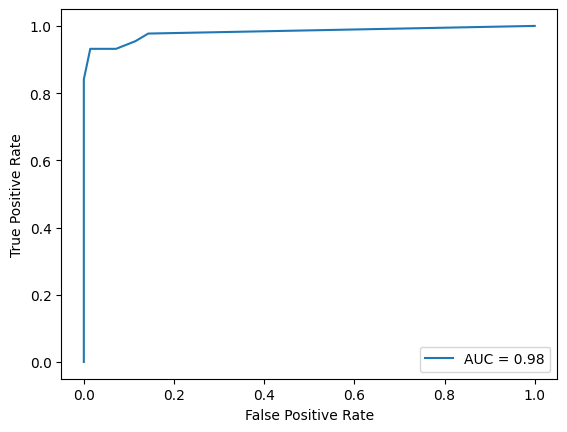

KNN classifier


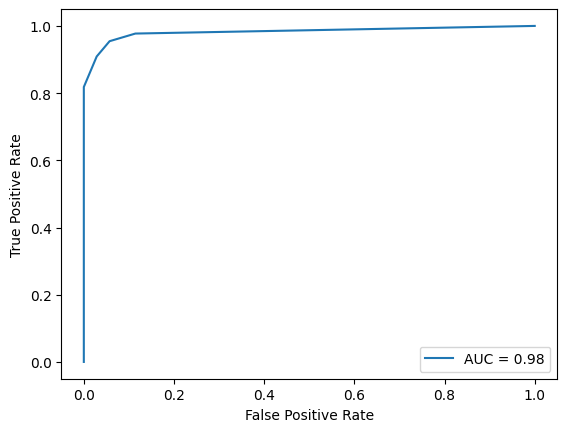

Random Forest calssifier


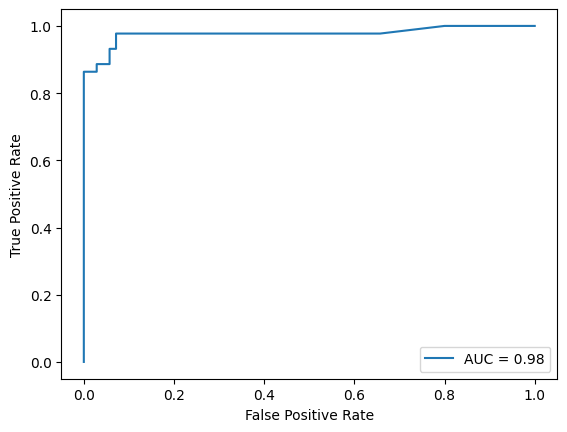

Adaboost classifier


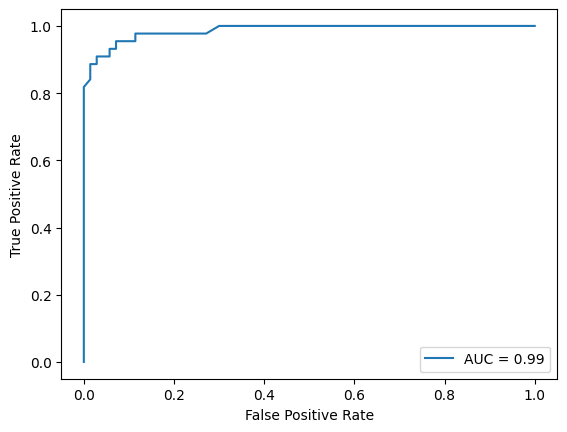

Gradientboot classifier


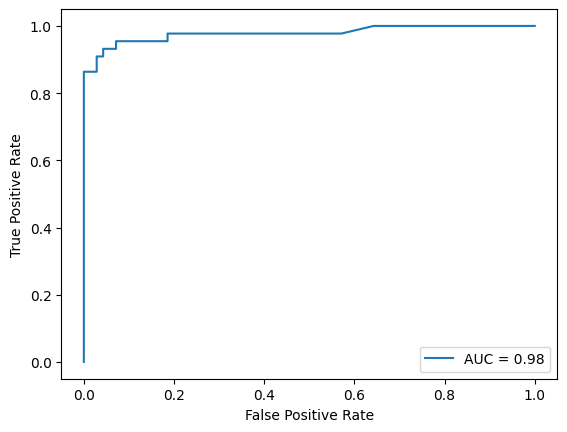

MLP


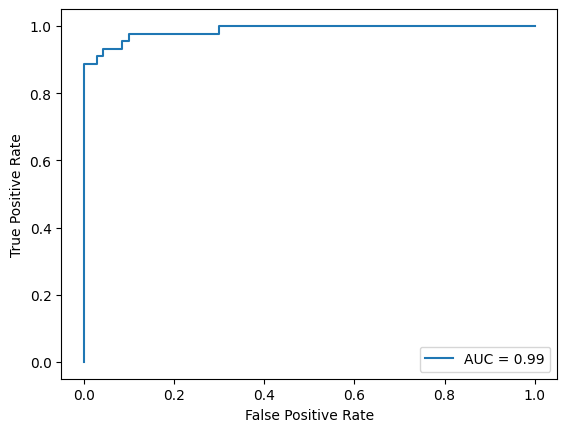

In [25]:
encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test) 

for index, tup in enumerate(trained_models):
    prepare_roc_curve(tup[0], tup[1])